<a href="https://colab.research.google.com/github/Clinda02/customer_analysis/blob/main/10_seasonal_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 10. 시즌별 판매 분석
* 시즌별 판매 추세 파악: 각 제품군별로 겨울, 봄, 여름, 가을 시즌에 따른 판매액의 변화를 파악
* 제품군별 성과 비교: 제품군별로 시즌에 따른 판매 성과를 비교함으로써, 어떤 제품군이 특정 시즌에 더 잘 팔리는지 파악


#### 회사 전략
* **시즌별 마케팅 전략 조정**: 분석 결과를 통해 특정 시즌에 판매가 증가하는 제품군을 확인한 경우, 해당 시즌에 맞춰 마케팅 활동을 강화하여 판매를 더욱 촉진할 수 있음

* **(★)재고 관리 최적화**: 시즌별 판매 추세를 이해함으로써, 재고 수준을 조절하여 과잉 재고 또는 재고 부족 상황을 방지할 수 있음.

* **신제품 개발 및 기존 제품 개선**: 일부 제품군이 특정 시즌에 성과가 저조한 경우, 제품 개선이나 신제품 개발을 통해 시장 수요를 더 잘 충족시킬 수 있도록 조치를 취할 수 있음.

* **시장 기회 식별**: 분석을 통해 아직 충분히 활용되지 않은 시즌별 판매 기회를 식별할 수 있음

* **경쟁 우위 확보**: 시즌별 판매 데이터를 분석함으로써, 경쟁사 대비 우리 회사의 제품군이 가지는 경쟁 우위를 파악하고 이를 기반으로 시장에서의 입지를 강화할 수 있음.


In [ ]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

conn = mysql.connector.connect(
  host = 'localhost',
  user = 'root',
  password = 'password',
  database = 'classicmodels'
)

# 커서 연결
cursor = conn.cursor()

# 시즌별 판매 분석 SQL 쿼리 실행
season_query = """
SELECT
p.productLine, YEAR(o.orderDate) AS OrderYear,
Case
	when Month(o.orderDate) IN (12,1,2) Then 'Winter'
	when Month(o.orderDate) IN (3,4,5) Then 'Spring'
	when Month(o.orderDate) IN (6,7,8) Then 'Summer'
ELSE 'Fall' END season,
SUM(od.quantityOrdered * od.priceEach) AS total_sales
FROM products p
JOIN orderdetails od ON od.productCode = p.productCode
JOIN orders o ON od.orderNumber = o.orderNumber
GROUP BY p.productLine, OrderYear, season
ORDER BY p.productLine, OrderYear, season;
"""

# 데이터프레임 생성 > cursor 이용
cursor.execute(season_query)

# 데이터 프레임 반환
columns = [desc[0] for desc in cursor.description]
df = pd.DataFrame(cursor.fetchall(), columns = columns)
# season_df = pd.read_sql_query(season_query, conn)

df

,productLine,OrderYear,season,total_sales
0,Classic Cars,2003,Fall,748931.95
1,Classic Cars,2003,Spring,247539.34
2,Classic Cars,2003,Summer,189163.28
3,Classic Cars,2003,Winter,189197.65
4,Classic Cars,2004,Fall,692945.95
...,...,...,...,...
65,Vintage Cars,2004,Spring,129595.00
66,Vintage Cars,2004,Summer,203715.28
67,Vintage Cars,2004,Winter,167479.44
68,Vintage Cars,2005,Spring,202025.19


In [ ]:
df.columns

Index(['productLine', 'OrderYear', 'season', 'total_sales'], dtype='object')

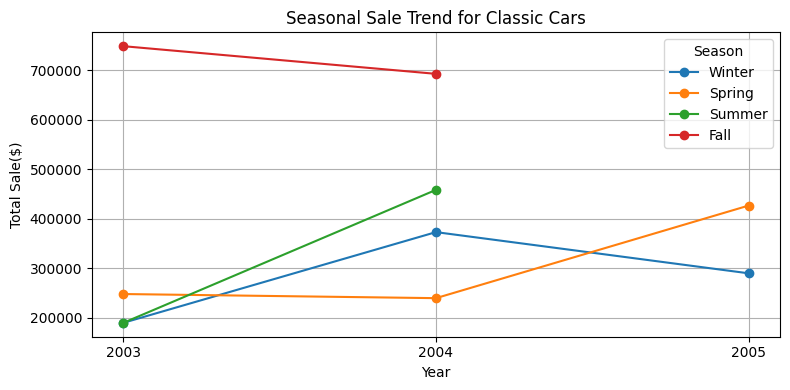

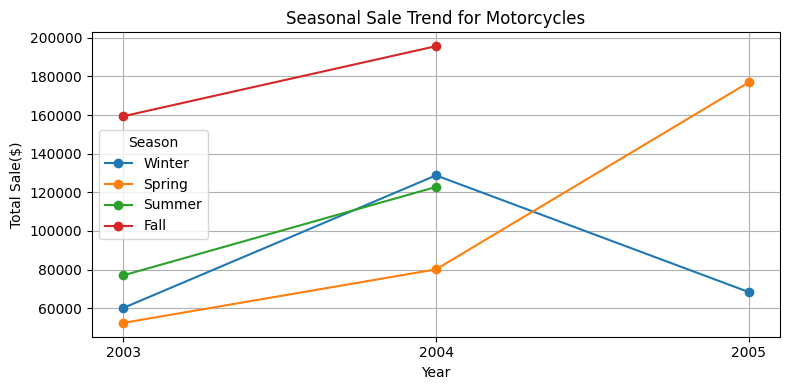

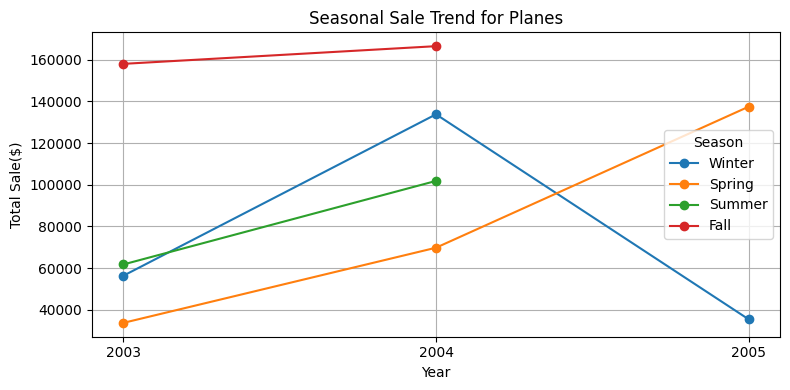

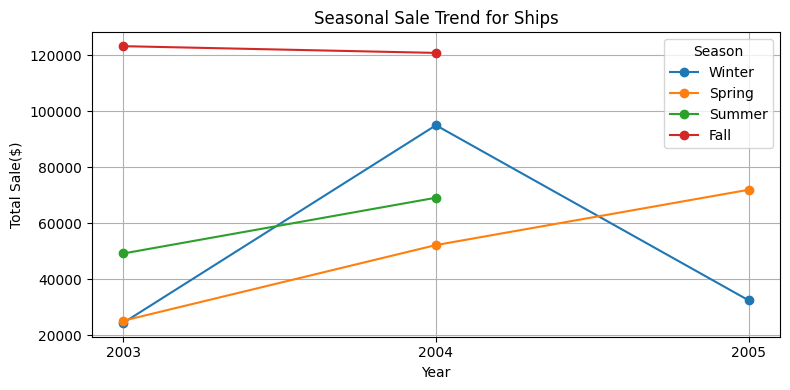

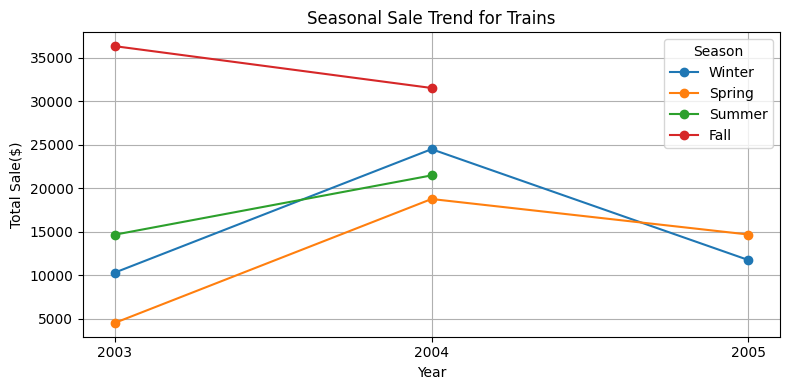

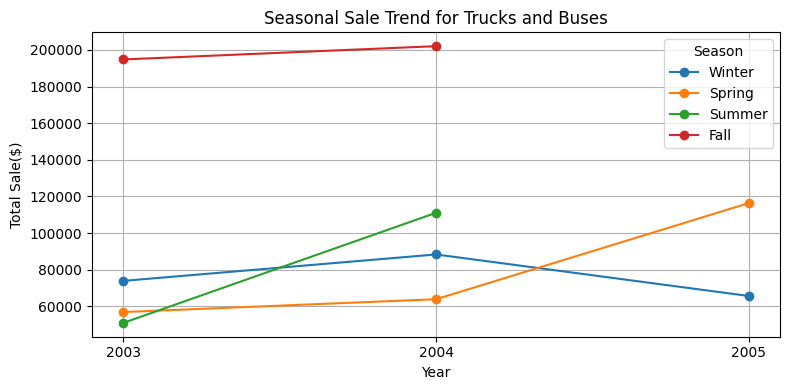

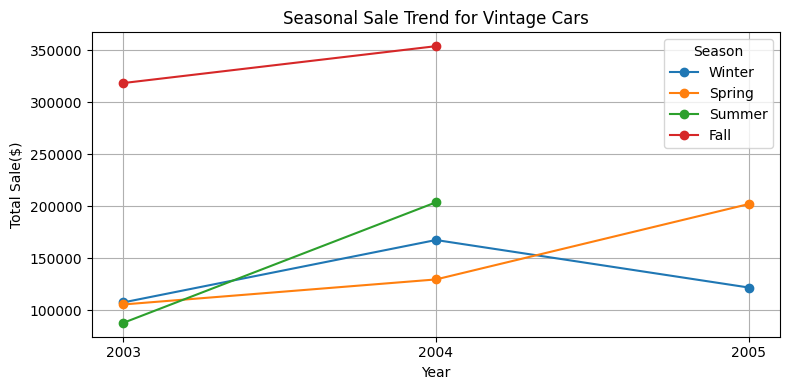

In [ ]:
# 제품군과 시즌별로 데이터를 분리하여 시각화
product_lines = df['productLine'].unique()
seasons = ['Winter', 'Spring', 'Summer', 'Fall']

for product_line in product_lines:
  plt.figure(figsize=(8,4))
  for season in seasons :
    subset = df[(df['productLine']== product_line) & (df['season']== season)]
    if not subset.empty:
      plt.plot(subset['OrderYear'].astype(str), subset['total_sales'], marker='o', linestyle='-', label = season)

  plt.title(f'Seasonal Sale Trend for {product_line}')
  plt.xlabel('Year')
  plt.ylabel('Total Sale($)')
  plt.grid()
  plt.legend(title='Season')
  plt.tight_layout()
  plt.show()

#### 인사이트 도출
* productLine과 상관 없이 **Fall** 시즌에 가장 판매량이 높았음.